## 구글 트렌드를 다른 시계열 데이터와 결합 

<img src="data/google_trend.png">

- 검색어 인기도가 이 세상에 의미하는 것은 무엇일까? 구글 트렌드를 통해 구글 검색어의 인기도에 대해 접근이 가능하다.
- 이번 시간을 통해 알아볼 사항은 아래와 같다 
    - '비트코인' 검색량과 비트코인 가격의 관련성 
    - 테슬라와 같은 인기 주식 검색량과 해당 주식 가격의 관련성 
    - '실업 수당'에 대한 검색이 미국의 실제 실업률과 어떤 차이를 보이는지 확인

- 이번 시간에서 배울 내용은 아래와 같다.
    - 동일한 주기로 다시 샘플링하고 반환하여 비교 가능한 시계열데이터를 만드는 방법(예를 들어 일별 데이터에서 월별 데이터로)
    - 범위 설정, 레이블, 선 스타일, 마커, 색상, 차트 해상도를 이용하여 맷플롯립 차트의 스타일 미세 조정
    - 시계열의 계절성을 시각적으로 알아볼 수 있도록 그리드를 사용해보기
    - 누락된 NaN인 값의 개수를 찾고 데이터프레임에서 NaN 값을 어떻게 찾는지
    - 차트 시간축의 스타일 지정을 더 잘 하기 위해 로케이터로 작업하는 방법

### 1. 데이터 탐색 - 구글 검색 데이터 이해하기 

In [1]:
# 필요한 모듈 임포트 
import pandas as pd 
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

#### 1-1. 테슬라 트렌드 데이터 

In [16]:
# 데이터 불러오기 1 - 테슬라 트렌드 데이터
df_tesla = pd.read_csv('data/TESLA Search Trend vs Price.csv')
print(df_tesla.shape)
df_tesla.head()

(124, 3)


,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


- 테슬라 데이터의 경우 124 행과 3 열로 구성 되어 있다. 
- 테슬라 데이터의 컬럼 정보는 아래와 같다 
    - **MONTH**: 월별 날짜 
    - **TSLA_WEB_SEARCH**: 테슬라 웹 서치 결과(인기도)
    - **TSLA_USD_CLOSE**: 테슬라 주가 종가기준 가격

In [17]:
# 테슬라 데이터의 통계 설명 추출 
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


In [18]:
# 테슬라 트렌드 검색량 최대, 최소값 추출
print(f'Largest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


- 데이터프레임에서 ".describe()" 함수를 사용하면 많은 통계 설명을 볼 수 있다.
    - count: 컬럼별 총 데이터 수
    - mean /std: 컬럼별 데이터 평균 / 표준편차 
    - min / max: 컬럼별 데이터 최소값 / 최대값
    - 25% / 50% / 75%: 백분위수의 각 지점으로, 분포를 반영해 평균을 보완하는 목적으로 사용.
- 테슬라의 최대 검색량은 "31"건, 최소 검색량은 "2"건으로 확인된다. 

#### 1-2. 실업률 트렌드 데이터

In [19]:
# 데이터 불러오기 - 실업률 트렌드 데이터 
df_unemployment = pd.read_csv('data/UE Benefits Search vs UE Rate 2004-19.csv')
print(df_unemployment.shape)
df_unemployment.head()

(181, 3)


,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [14]:
# 실업률 트렌드 데이터 통계 설명
df_unemployment.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.000000,181.000000
mean,35.110497,6.217680
std,20.484925,1.891859
min,14.000000,3.700000
25%,21.000000,4.700000
50%,26.000000,5.400000
75%,45.000000,7.800000
max,100.000000,10.000000


In [27]:
# 실업률 트렌드 검색량 최대, 최소값 추출
print(f'Largest value for UE Benefits in Web Search: {df_unemployment.UE_BENEFITS_WEB_SEARCH.max()}')
print(f'Smallest value for UE Benefits in Web Search: {df_unemployment.UE_BENEFITS_WEB_SEARCH.min()}')

Largest value for UE Benefits in Web Search: 100
Smallest value for UE Benefits in Web Search: 14


- 실업률 데이터의 경우 181 행과 3 열로 구성 되어 있다.
- 실업률 데이터의 컬럼 정보는 아래와 같다.
    - MONTH: 월별 날짜
    - UE_BENEFITS_WEB_SEARCH: 실업률 웹 서치 결과(인기도)
    - UNRATE: 실재 실업률 
- 실업률의 최대 검색량은 "100"건, 최소 검색량은 "14"건으로 확인된다.

#### 1-3 .비트코인 트렌드 데이터

In [23]:
# 데이터 불러오기 3 - 비트코인 가격 데이터
df_btc_price = pd.read_csv('data/Daily Bitcoin Price.csv')
print(df_btc_price.shape)
df_btc_price.head()

(2204, 3)


,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [24]:
# 데이터 불러오기 4 - 비트코인 트렌드 데이터 
df_btc_search = pd.read_csv('data/Bitcoin Search Trend.csv')
print(df_btc_search.shape)
df_btc_search.head()

(73, 2)


,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [25]:
# 비트코인 가격 데이터 통계 설명
df_btc_price.describe()

,CLOSE,VOLUME
count,2203.000000,2.203000e+03
mean,4429.421245,8.043622e+09
std,4148.150071,1.176529e+10
min,178.102997,5.914570e+06
25%,433.629502,6.029915e+07
50%,3637.520020,2.018890e+09
75%,7997.372803,1.322478e+10
max,19497.400391,7.415677e+10


In [26]:
# 비트코인 트렌드 데이터 통계 설명
df_btc_search.describe()

,BTC_NEWS_SEARCH
count,73.000000
mean,15.013699
std,15.146959
min,3.000000
25%,5.000000
50%,14.000000
75%,18.000000
max,100.000000


In [29]:
# 비트코인 트렌드 검색량 최대, 최소값 추출
print(f'Largest value for BTC News Search in Web Search: {df_btc_search.BTC_NEWS_SEARCH.max()}')
print(f'Smallest value for BTC News Searc in Web Search: {df_btc_search.BTC_NEWS_SEARCH.min()}')

Largest value for BTC News Search in Web Search: 100
Smallest value for BTC News Searc in Web Search: 3


- 비트코인 데이터는 총 2개의 데이터가 존재한다. 일별 비트코인의 종가와 거래량을 알 수 있는 "Daily Bitcoin Price.csv"와 비트코인의 구글 트렌드에서 나온 "Bitcoin Search Trend.csv" 이다.
- 먼저 일별 비트코인 종가 및 거래량 데이터의 컬럼의 의미는 아래와 같다.
    - DATE: 일별 날짜
    - CLOSE: 일별 비트코인의 종가
    - VOLUME: 일별 비트코인 거래량
- 비트코인 구글 트렌드 데이트의 컬럼의 의미는 아래와 같다.
    - MONTH: 월별 날짜
    - BTC_NEWS_SEARCH: 비트코인 뉴스 검색량 
- 비트코인 뉴스의 최대 검색량은 "100"건, 최소 검색량은 "3"건으로 확인된다.

#### 1-4. 검색 숫자가 의미하는 것은 무엇일까? 
- 데이터프레임에서 구글의 검색 관심도 범위는 0에서 100 사이라는 점을 알 수 있다. 그런데 이것이 의미하는 것은 무엇일까? 구글이 검색 관심도 값을 정의하는 법은 아래와 같다. 
    - 검색 관심도 값은 주어진 지역 및 시간에 대한 차트상의 최대치에 대한 상대적 검색 관심도를 나타낸다. 
    - 100의 값은 용어의 관심도가 가질 수 있는 최고치이다. 
    - 50의 값은 중간 정도 인기가 있음을 의미힌다. 
    - 0 점은 해당 용어에 대한 충분한 데이터가 없음을 의미힌다. 
- 기본적으로 실제 검색량은 공개된 정보가 아니며, 구글은 조정된 수치만을 제공한다. 
- 각각의 데이터 수치는 상대적 인기도를 비교하기 위해 해당 검색 지역 및 시간 범위 별로 나눠진다. 
- 검색어 각각에 대해 구글은 각 지역과 기간별 총 검색량과 우리가 검색한 검색어 간의 관련성을 찾아준다. 그 다음 이 모든 측정값을 단일 인기도 측정값으로 결합해주고 주제 전체에 걸쳐 값을 조정한다. 
- 즉, 구글 트렌드는 해당 주제와 관련된 검색이 몇 건 되었는지 정확한 수를 알려주기보다 보기 좋게 가공한 결과를 제시한다. 
- 다음은 해당 csv 데이터를 생성하기 위해 사용했던 구글 트렌드 검색 매개변수 이다. 
    -  "Tesla", 전세계, 웹 검색
    - "Bitcoin", 전세계, 뉴스 검색
    - "Unemployment Benefits", 미국, 웹 검색
    
<img src="data/google_parameter.png">

### 2. 데이터 정리 - 시계열 데이터를 다시 샘플링 하기 

#### 2-1. 누락된 값 찾기 
- 첫째로, 데이터프레임에 누락된 값 혹은 가비지 값은 없는지 확인해야 한다.

In [32]:
# 테슬라 데이터 결측치 확인 
df_tesla.isna().sum()

MONTH              0
TSLA_WEB_SEARCH    0
TSLA_USD_CLOSE     0
dtype: int64

In [33]:
# 실업률 데이이터 결측치 확인
df_unemployment.isna().sum()

MONTH                     0
UE_BENEFITS_WEB_SEARCH    0
UNRATE                    0
dtype: int64

In [36]:
# 비트코인 가격 데이터 결측치 확인
df_btc_price.isna().sum()

DATE      0
CLOSE     1
VOLUME    1
dtype: int64

In [34]:
# 비트코인 트렌드 결측치 확인
df_btc_search.isna().sum()

MONTH              0
BTC_NEWS_SEARCH    0
dtype: int64

In [45]:
# 결측치 및 결측값, 결측치 컬럼 정리 
print(f"Missing values? for BTC price?: {df_btc_price.isna().values.any()}")
print(f'Number of missing values?: {df_btc_price.isna().values.sum()}')
df_btc_price[df_btc_price.CLOSE.isna()]

Missing values? for BTC price?: True
Number of missing values?: 2


,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


- 데이터프레임 모두 살펴본 결과 "비트코인 가격 데이터"에서 누락된 값이 발견 되었다.
- 여기서 결측치는 증명할 수 있는 방법은 ".isna()" 메소드를 이용하는 것이다. 이는 불리언 값 전체를 반환하지만 ".values.any()"를 연결해서 시리즈의 값이 "True"라는 것을 알 수 있다.
- 누락된 값의 개수는 ".sum()"을 사용하여 시리즈 내 "True" 발생 건수의 총 합을 구한다.
- 누락된 값이 발생하는 행을 찾기 위해서는 ".isna()"를 한번 더 사용하여 데이터프레임의 서브셋을 생성할 수 있다. 

In [46]:
# 결측치 제거 
df_btc_price.dropna(inplace=True)

- 누락된 값을 제거하기 위해서 ".dropna()"를 사용하면 된다. inplace 인수를 사용하면 데이터프레임을 덮어쓰기 할 수 있다. 

#### 2-2. 문자열을 DateTime 객체로 변환

In [48]:
# 테슬라 데이터 정보 확인
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MONTH            124 non-null    object 
 1   TSLA_WEB_SEARCH  124 non-null    int64  
 2   TSLA_USD_CLOSE   124 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.0+ KB


In [49]:
# 실업률 데이터 정보 확인
df_unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MONTH                   181 non-null    object 
 1   UE_BENEFITS_WEB_SEARCH  181 non-null    int64  
 2   UNRATE                  181 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.4+ KB


In [50]:
# 비트코인 가격 데이터 정보 확인
df_btc_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2203 entries, 0 to 2203
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    2203 non-null   object 
 1   CLOSE   2203 non-null   float64
 2   VOLUME  2203 non-null   float64
dtypes: float64(2), object(1)
memory usage: 68.8+ KB


In [51]:
# 비트코인 트렌드 데이터 정보 확인
df_btc_search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MONTH            73 non-null     object
 1   BTC_NEWS_SEARCH  73 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


In [57]:
# 시간 데이터 타입 변경 (str -> datetime) 
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)                # 테슬라 데이터 
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)  # 실업률 데이터 
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)          # 비트코인 가격 데이터 
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)      # 비트코인 트렌드 데이터 

- 열의 모든 날짜 데이터는 문자열 형식이다. 이를 Datetime 객체로 변환하기 위해 ".to_datetime()" 함수를 사용했다.

#### 2-3. 시계열 데이터를 다시 샘플링하기 
- 다음으로, 비트코인 가격과 비트코인 검색량 비교를 어떻게 할지에 대해 생각해볼 차례이다. 비트코인 가격은 일별 데이터지만 비트코인 검색 인기도는 월별 데이터이다. 
- 일별 데이터를 월별 데이터로 전환하기 위해 ".resample()" 함수를 사용하면 된다. 
- 여기서 정해줄 것은 어떤 열을 사용할지(예를들면 DATE열)와 원하는 샘플 빈도(예를들면 rule)이다. 
- 우리는 월별 빈도를 원하므로 "M"을 사용한다. 시계열을 다른 빈도로 다시 샘플링 해야하는 경우 [판다스 문서](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects) 목록에서 다른 선택사항을 찾압로 수 있다(예를 들어, 연단위는 "Y", 분단위는 "T") 
- 샘플링이 끝나면 데이터를 어떻게 처리할지 파악해야 한다.

In [61]:
# 해당 월말 가격 
df_btc_monthly = df_btc_price.resample('M', on='DATE').last()
df_btc_monthly.head()

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


- 이 경우, 매월 마지막으로 이용 가능한 가격, 즉 해당 월말의 가격이 필요하다.

In [60]:
# 한 달 동안 평균 가격을 원할 시 
df_btc_monthly = df_btc_price.resample('M', on='DATE').mean()
df_btc_monthly.head()

,CLOSE,VOLUME
DATE,,
2014-09-30,407.182428,2.934864e+07
2014-10-31,364.148873,2.912885e+07
2014-11-30,366.099799,2.199111e+07
2014-12-31,341.267871,1.784201e+07
2015-01-31,248.782547,3.544555e+07


- 만약 한 달 동안의 평균 가격을 원한다면 위와 같이 처리할 수 있다.

In [62]:
# 최종 샘플링 데이터 추출
print(df_btc_monthly.shape)
df_btc_monthly.head()

(73, 2)


,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


- 가격 데이터에는 73행이 있다. 이는 검색 데이터와 동일한 결과이다.

### 3. 데이터 시각화 - 맷플롯립을 이용한 테슬라 선형 차트
- 지난시간에 해봤던 다중 선형차트에서 스타일 지정 및 차트의 눈금 조절에 대해 그려보자

Text(0, 0.5, 'TSLA USE Close')

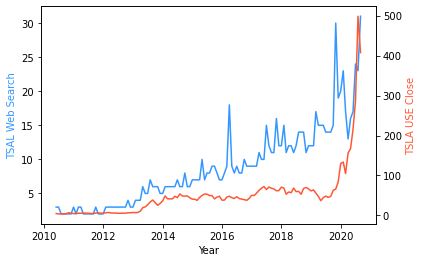

In [68]:
# 테슬라 주가 대비 검색 인기도에 대한 선형 차트 
ax1 = plt.gca()                        # 현재 축 얻고 
ax2 = ax1.twinx()                      # 동일한 X축을 공유하는 다른 축 생성 

# 차트 생성 및 스타일 추가 
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='#3397FF')     # 테슬라 검색량 
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#FF5733')      # 테슬라 종가 주가 가격

# 레이블 추가 
ax1.set_xlabel('Year')
ax1.set_ylabel('TSAL Web Search', color='#3397FF')
ax2.set_ylabel('TSLA USE Close', color='#FF5733')

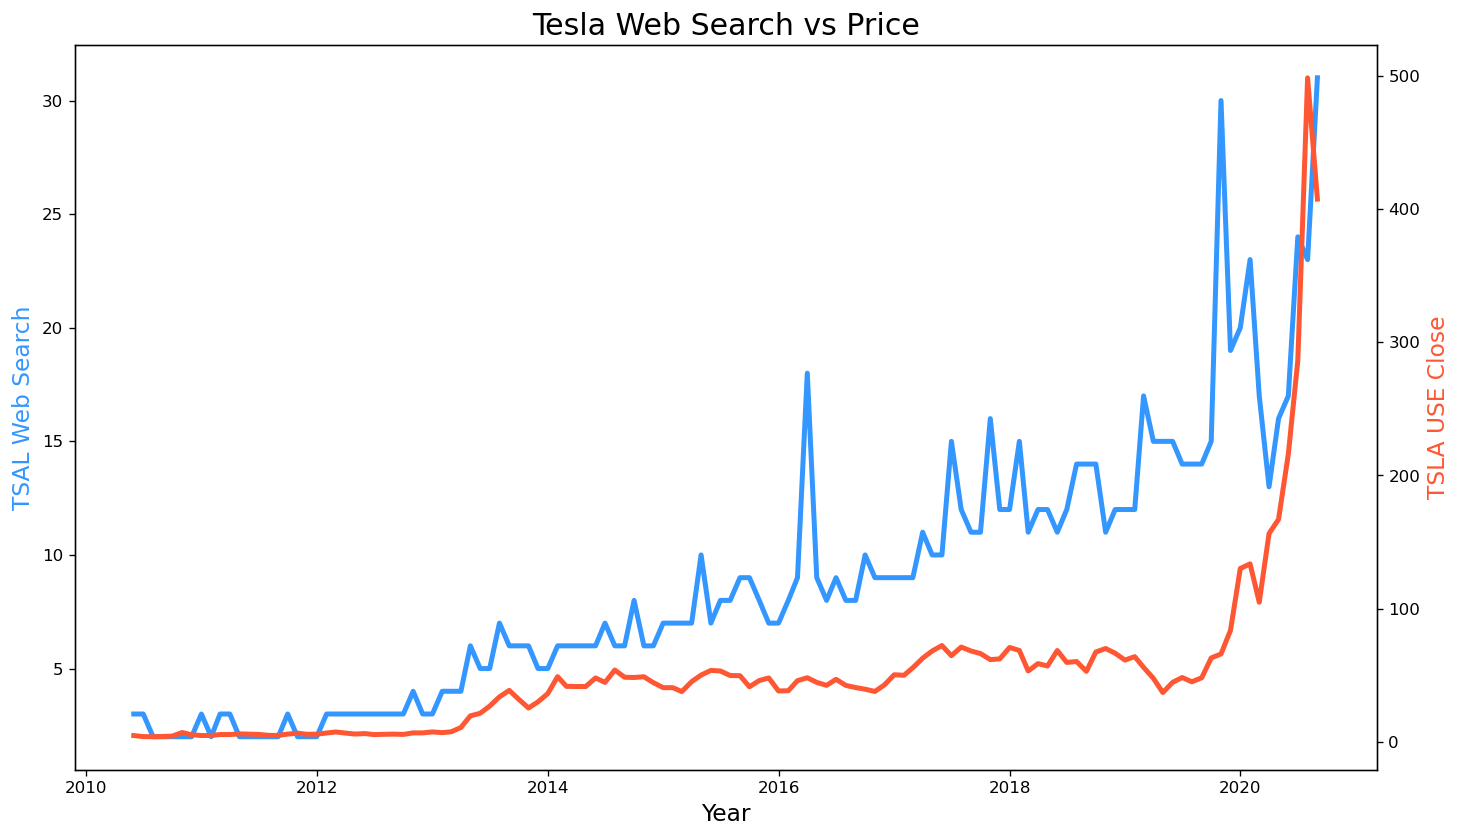

In [69]:
# 테슬라 주가 대비 검색 인기도에 대한 선형 차트 - 차트 크기 조절

# 차트 크기 설정 
plt.figure(figsize=(14, 8), dpi=120)                # 사이즈와 인치당 도트수 설정
plt.title('Tesla Web Search vs Price', fontsize=18) # 타이틀 설정 


ax1 = plt.gca()                        # 현재 축 얻고 
ax2 = ax1.twinx()                      # 동일한 X축을 공유하는 다른 축 생성 

# 차트 생성 및 스타일 추가 
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='#3397FF', linewidth=3)     # 테슬라 검색량 
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#FF5733', linewidth=3)      # 테슬라 종가 주가 가격

# 레이블 추가 
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('TSAL Web Search', color='#3397FF', fontsize=14)
ax2.set_ylabel('TSLA USE Close', color='#FF5733', fontsize=14)

# 셀 아래 차트 생성 
plt.show()

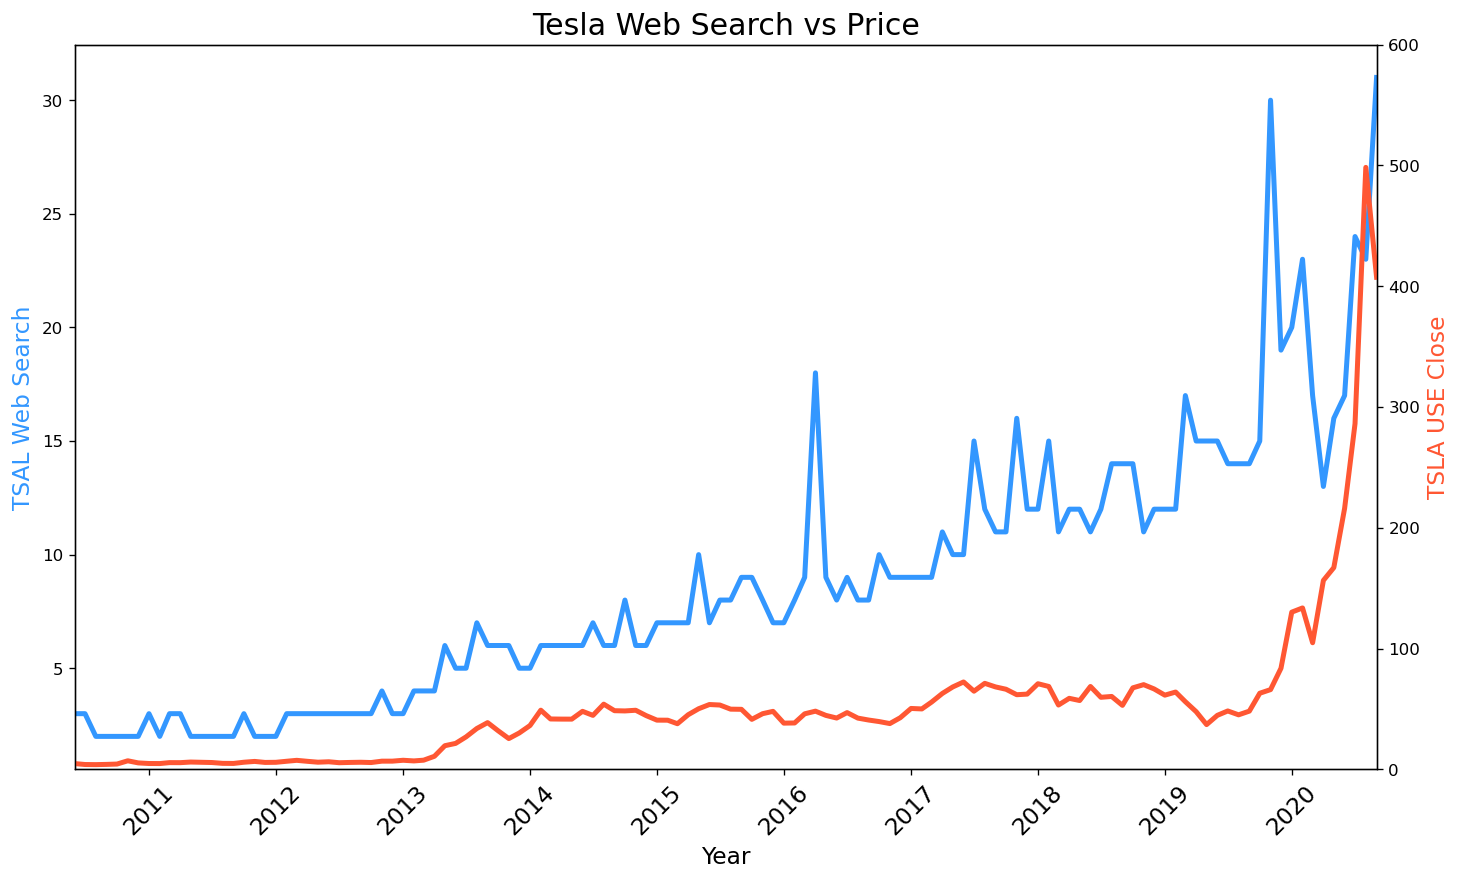

In [79]:
# 테슬라 주가 대비 검색 인기도에 대한 선형 차트 - 눈금회전(차트에 표시할 데이터를 정확하게 제어하기 위함)

# 차트 크기 설정 
plt.figure(figsize=(14, 8), dpi=120)                 # 사이즈와 인치당 도트수 설정
plt.title('Tesla Web Search vs Price', fontsize=18)  # 타이틀 설정

# 크기를 늘리고 레이블을 x축으로 회전
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()                        # 현재 축 얻고 
ax2 = ax1.twinx()                      # 동일한 X축을 공유하는 다른 축 생성 

# 레이블 추가 
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('TSAL Web Search', color='#3397FF', fontsize=14)
ax2.set_ylabel('TSLA USE Close', color='#FF5733', fontsize=14)

# 축의 최소값 및 최대값 설정 - 테슬라 주가 차트 절대값 설정
ax2.set_ylim([0, 600])                                      # 테슬라 종가 주가 가격 
ax2.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])  # 날짜

# 차트 생성 및 스타일 추가 
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='#3397FF', linewidth=3)     # 테슬라 검색량 
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#FF5733', linewidth=3)      # 테슬라 종가 주가 가격

# 셀 아래 차트 생성 
plt.show()

- 가끔 맷플롯립 경고창이 뜰 것인데, 해당 경고창은 오류는 아니지만, 어떤 날짜/시간 변환기를 사용할지 명시해주는 참고 사항이다. 결국 현재 차트의 타임라인을 x축이 해주고 있는데, 해당 문제를 해결하려면 아래와 같은 코드를 사용하면 된다. 

In [ ]:
# 경고 메시지를 피하기 위한 날짜 변환기를 등록
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
# 경고창 무시하기 
import warnings
warnings.filterwarnings('ignore')

### 4. Locator와 DateFormatter를 사용하여  타임라인에 눈금 표시

#### 4-1. 로케이터 눈금 표시 추가하기
- 시계열 작업을 할 때, 원하는 모습으로 차트에 눈금을 표시하기 여려울 때가 많다. 그래서 로케티어의 도움이 필요하다.
- 로케이터를 사용하면 첫 번째 이미지와 같이 보이는 x축을, 두 번째 이미지와 같이 보이도록 할 수 있다.
    - 일반 x축 
    <img src="data/non_locator.png">
    
    - 로케이터가 적용된 x축 
    <img src="data/locator.png">

- 첫 번째 단계는 "matplotlib.dates"를 가져오는 것이다. 해당 모듈은 모든 날짜 표시기능이 있다.
- 두 번째 단계는 "YearLocator()" 및 "MonthLocator()" 객체를 사용한다. 해당 객체들은 맷플롯립에서 연도와 월을 찾는데 도움이 된다. 
- 세 번째 단계는 "DateFormatter()" 사용이다. 해당 객체는 날짜를 표시하는 방식을 지정할 때 도움이 된다. 

In [80]:
# 1단계 - matplotlib.dates 가져오기 
import matplotlib.dates as mdate

In [81]:
# 2단계 - "YearLocator()" 및 "MonthLocator()" 객체 선언 
years = mdate.YearLocator()              # 년도 
months = mdate.MonthLocator()            # 월 
years_fmt = mdate.DateFormatter('%Y')    # 년도 데이트포메터로 지정

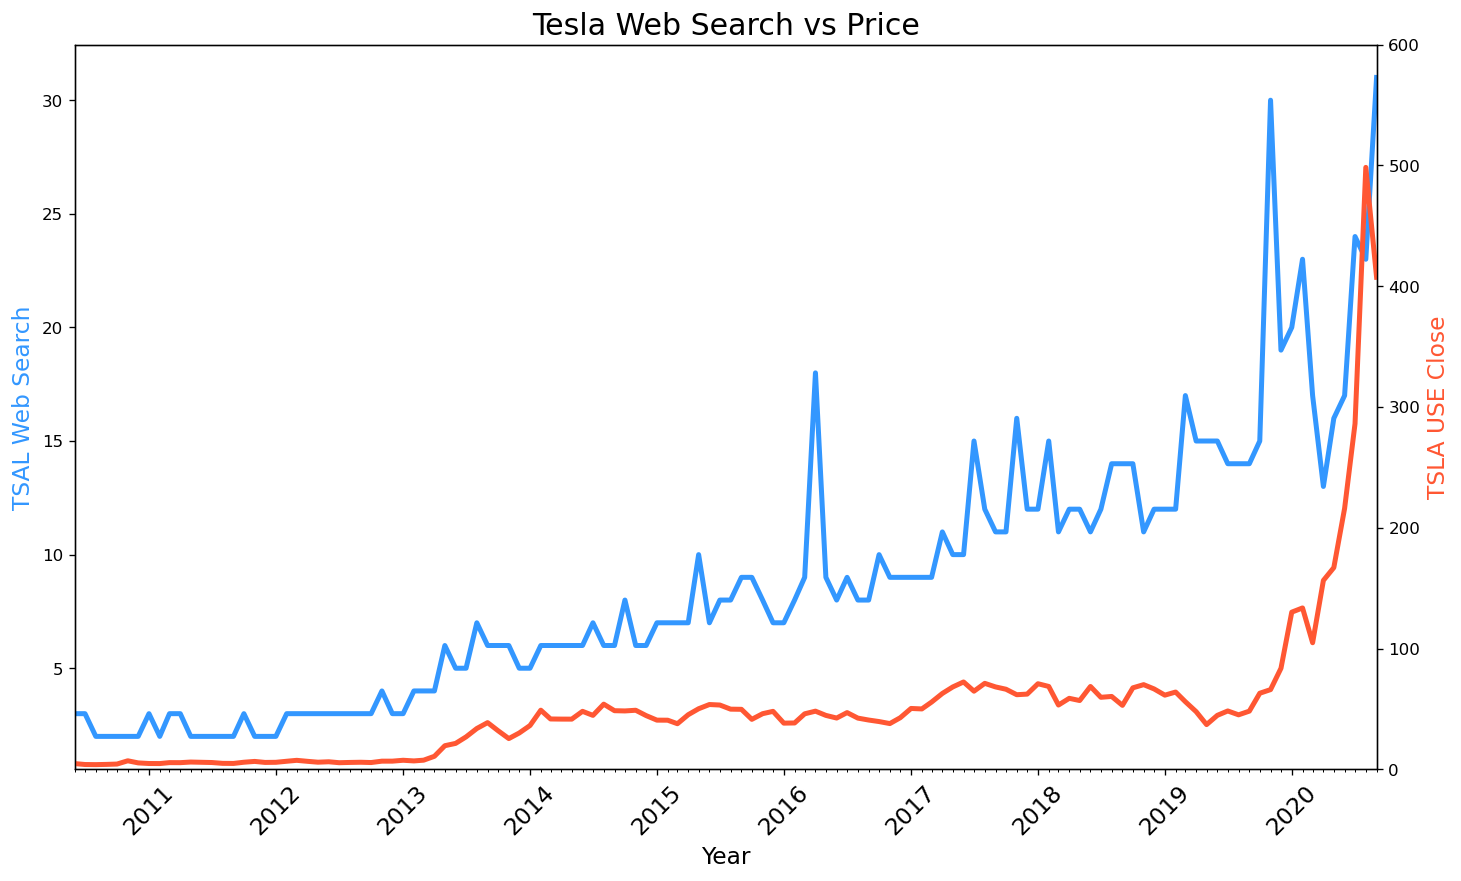

In [85]:
# 3단계 - 차트에 적용
# 차트 크기 설정 
plt.figure(figsize=(14, 8), dpi=120)                 # 사이즈와 인치당 도트수 설정
plt.title('Tesla Web Search vs Price', fontsize=18)  # 타이틀 설정

# 크기를 늘리고 레이블을 x축으로 회전
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()                        # 현재 축 얻고 
ax2 = ax1.twinx()                      # 동일한 X축을 공유하는 다른 축 생성 

# 레이블 추가 
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('TSAL Web Search', color='#3397FF', fontsize=14)
ax2.set_ylabel('TSLA USE Close', color='#FF5733', fontsize=14)

# 축의 최소값 및 최대값 설정 - 테슬라 주가 차트 절대값 설정
ax2.set_ylim([0, 600])                                      # 테슬라 종가 주가 가격 
ax2.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])  # 날짜

# 차트 생성 및 스타일 추가 
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='#3397FF', linewidth=3)     # 테슬라 검색량 
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#FF5733', linewidth=3)      # 테슬라 종가 주가 가격

# 지정된 로케이터 및 데이트포메터 적용 
ax1.xaxis.set_major_locator(years)               # 년도 적용 
ax1.xaxis.set_major_formatter(years_fmt)         # 년도 지정된 데이터포메터 적용
ax1.xaxis.set_minor_locator(months)              # 월 적용

# 셀 아래 차트 생성 
plt.show()

- 차트 결과를 보면 x축에 눈금이 표시된 것을 알 수 있다. 
- 눈금 표시를 통해 차트 가운데 2016년 3월 테슬라에 대한 관심이 급증한 시기를 시각적으로 확인할 수 있다 아마 테슬라 모델 3이 공개된 때라고 추정된다.
- 또한 데이터 기준 가장 최근 검색이 급증한 시기는 신차 출시 시기가 아니라, 회사 주가가 치솟은 시기라는 점을 분명히 알 수 있다.